## Analyzing Traffic Accidents 
The aim of this project is to analyze factors that influence road traffic accidents, the common causes and with this knowledge, certain measures can be taken to reduce the accidents

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [2]:
#loading data
df = pd.read_csv('RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Hypothesis generation
1. People with less driving experiences are likely to cause accident

2. Road Traffic Accidents (RTA) are common during rainy periods 

3. Casualties tend to worsen with the number of vehicles involved.

4. Most accidents occur in residential areas

5. The day and time most accidents occur alluding it to b due to rush hour 

## Data exploration

In [3]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
#checking shape of the data
df.shape

(12316, 32)

In [5]:
#checking percentage of missing data
missing_data = (df.isna().sum()/ len(df)) * 100
missing_data

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

In [6]:
df.describe(include = 'all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning

In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
df['vehicle_type'] = df['Type_of_vehicle'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip()
#dropping missing values
df.dropna(subset = ['vehicle_type'], inplace=True)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,vehicle_type
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,Automobile
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Public seats
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,Lorry Q
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Public seats
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury,Automobile


In [9]:
df['vehicle_type'].unique()

array(['Automobile', 'Public   seats', 'Lorry Q', 'Public  seats',
       'Long lorry', 'Taxi', 'Pick up upto Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [10]:
df['vehicle_type'].nunique()

15

In [11]:
df['vehicle_type'] = df['vehicle_type'].replace({
    'Public   seats': 'Public bus',
    'Public  seats': 'Public bus',
    'Bajaj': 'Motorcycle',
    'Turbo': 'Motorcycle',
    'Long lorry': 'Lorry',
    'Lorry Q': 'Lorry',
    'Pick up upto Q': 'Pick up'
})

# Checking unique values after replacement
print(df['vehicle_type'].unique())

['Automobile' 'Public bus' 'Lorry' 'Taxi' 'Pick up' 'Stationwagen'
 'Ridden horse' 'Other' 'Motorcycle' 'Special vehicle' 'Bicycle']


In [12]:
df['vehicle_type'].nunique()

11

In [13]:
#replacing na with Nan for 'Sex_of_casualty'
df['Sex_of_casualty'].replace('na', np.nan, inplace = True)
df['Sex_of_casualty'].fillna('Unknown', inplace = True)

In [14]:
#replacing na with Nan for 'Sex_of_casualty'
df['Age_band_of_casualty'].replace('na', np.nan, inplace = True)
df['Age_band_of_casualty'].fillna('Unknown', inplace = True)

In [15]:
#replacing na with Nan for Casualty Severity
df['Casualty_severity'].replace('na', np.nan, inplace = True)
df['Casualty_severity'].fillna(0, inplace = True)
df['Casualty_severity'] = pd.to_numeric(df['Casualty_severity'])

In [16]:
#replacing na with Nan for Casualty Class
df['Casualty_class'] =df['Casualty_class'].replace('na', np.nan)
mode_casualty = df['Casualty_class'].mode()[0]
df['Casualty_class'].fillna(mode_casualty, inplace = True)

In [17]:
#convert date data type to date time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [18]:
#dropping the missing values in 'Road_surface_type'
df.dropna(subset=['Road_surface_type'], inplace = True)

In [19]:
#dropping the missing values in 'Driving_experience'
df.dropna(subset=['Driving_experience'], inplace = True)

In [20]:
#using a placeholder to fill in missing values for Educational level
df['Educational_level'].fillna('Unknown', inplace = True)
df['Educational_level'].value_counts()

Educational_level
Junior high school    6808
Elementary school     1916
High school            989
Above high school      330
Unknown                257
Writing & reading      165
Illiterate              41
Name: count, dtype: int64

In [21]:
#using the most common occurrence to fill in the owner of vehicle
mode_value = df['Owner_of_vehicle'].mode()[0]
df['Owner_of_vehicle'].fillna(mode_value, inplace = True)

In [22]:
#dropping the missing values in 'Vehicle_movement'
df.dropna(subset=['Vehicle_movement'], inplace = True)

In [23]:
df['Vehicle_driver_relation'].value_counts()
#dropping the missing values in 'Vehicle_movement'
df.dropna(subset=['Vehicle_driver_relation'], inplace = True)

In [24]:
#using a placeholder to fill in missing values for 'Service_year_of_vehicle'
df['Service_year_of_vehicle'].fillna('Unknown', inplace = True)

In [25]:
#dropping the missing values in 'Type_of_collision'
df.dropna(subset=['Type_of_collision'], inplace = True)

In [26]:
#using a placeholder to fill in missing values for 'Types_of_Junction'
df['Types_of_Junction'].fillna('Unknown', inplace = True)

In [27]:
#dropping the missing values in 'Area_accident_occured'
df.dropna(subset=['Area_accident_occured'], inplace = True)

In [28]:
#using a placeholder to fill in missing values for 'Lanes_or_Medians'
df['Lanes_or_Medians'].fillna('Unknown', inplace = True)

In [29]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,vehicle_type,Hour
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Unknown,Unknown,0,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,Automobile,17
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Unknown,Unknown,0,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Public bus,17
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,Lorry,17
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Public bus,1
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,Unknown,Unknown,0,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,Automobile,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Unknown,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Unknown,Unknown,0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,Lorry,16
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Unknown,Unknown,0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,Automobile,18
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,Motorcycle,13
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Unknown,Unknown,0,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,Lorry,13


In [30]:
#Before dropping columns, it is important to check their data and see if it os valuable for the analysis
df['Defect_of_vehicle'].value_counts() #Majority of the vehicles have no defects

Defect_of_vehicle
No defect    6336
7              50
5              25
Name: count, dtype: int64

In [31]:
df['Road_allignment'].value_counts() #little usefulness for our analysis

Road_allignment
Tangent road with flat terrain                   8363
Tangent road with mild grade and flat terrain     410
Steep grade downward with mountainous terrain     356
Tangent road with mountainous terrain and         301
Gentle horizontal curve                           134
Escarpments                                        97
Sharp reverse curve                                45
Tangent road with rolling terrain                  26
Steep grade upward with mountainous terrain        14
Name: count, dtype: int64

In [32]:
df['Work_of_casuality'].value_counts() #has little importance to the analysis

Work_of_casuality
Driver           4717
Self-employed    1631
Employee          443
Other             386
Student            84
Unemployed         24
Unknown            16
Name: count, dtype: int64

In [33]:
df['Fitness_of_casuality'].value_counts() #Most of the people affected have no disabilities.

Fitness_of_casuality
Normal          7694
Deaf              14
Blind             14
NormalNormal      14
Other             10
Name: count, dtype: int64

In [34]:
#dropping columns that arent important to the analysis
columns_to_drop = ['Defect_of_vehicle','Road_allignment','Work_of_casuality','Fitness_of_casuality','Type_of_vehicle']
df.drop(columns = columns_to_drop, inplace = True)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,vehicle_type,Hour
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Owner,Above 10yr,Residential areas,...,Going straight,Driver or rider,Unknown,Unknown,0,Not a Pedestrian,Moving Backward,Slight Injury,Automobile,17
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Owner,5-10yrs,Office areas,...,Going straight,Driver or rider,Unknown,Unknown,0,Not a Pedestrian,Overtaking,Slight Injury,Public bus,17
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Owner,Unknown,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,Lorry,17
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Governmental,Unknown,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,Public bus,1
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Governmental,Above 10yr,Residential areas,...,U-Turn,Driver or rider,Unknown,Unknown,0,Not a Pedestrian,No priority to vehicle,Slight Injury,Automobile,17


In [35]:
#checking how many rows and columns left after cleaning has been done
df.shape

(9848, 29)

## Data Analysis and Visualization
This analysis will be divided into two: Univariate and Bivariate analysis. 

### Univariate Analysis

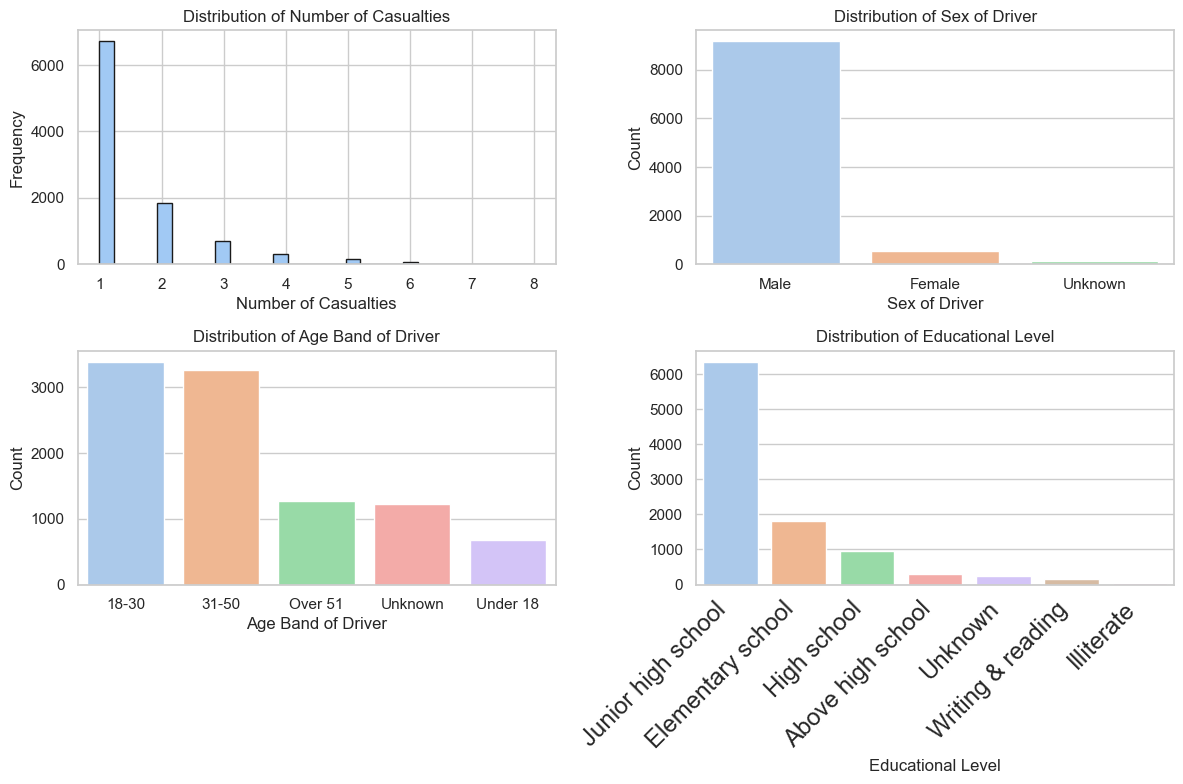

In [36]:
# Set the style and color palette
sns.set(style='whitegrid')
sns.set_palette('pastel')

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot distribution of Number_of_casualties
axes[0, 0].hist(df['Number_of_casualties'], bins=30, edgecolor='k')
axes[0, 0].set_title('Distribution of Number of Casualties')
axes[0, 0].set_xlabel('Number of Casualties')
axes[0, 0].set_ylabel('Frequency')

# Plot distribution of Sex of Driver
sns.countplot(data=df, x='Sex_of_driver', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Sex of Driver')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Sex of Driver')

# Plot distribution of Age Band of Driver
order = df['Age_band_of_driver'].value_counts().index
sns.countplot(data=df, x='Age_band_of_driver', ax=axes[1, 0], order = order)
axes[1, 0].set_title('Distribution of Age Band of Driver')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Age Band of Driver')

# Plot distribution of Educational Level
order = df['Educational_level'].value_counts().index
sns.countplot(data=df, x='Educational_level', ax=axes[1, 1], order = order)
axes[1, 1].set_title('Distribution of Educational Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Educational Level')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


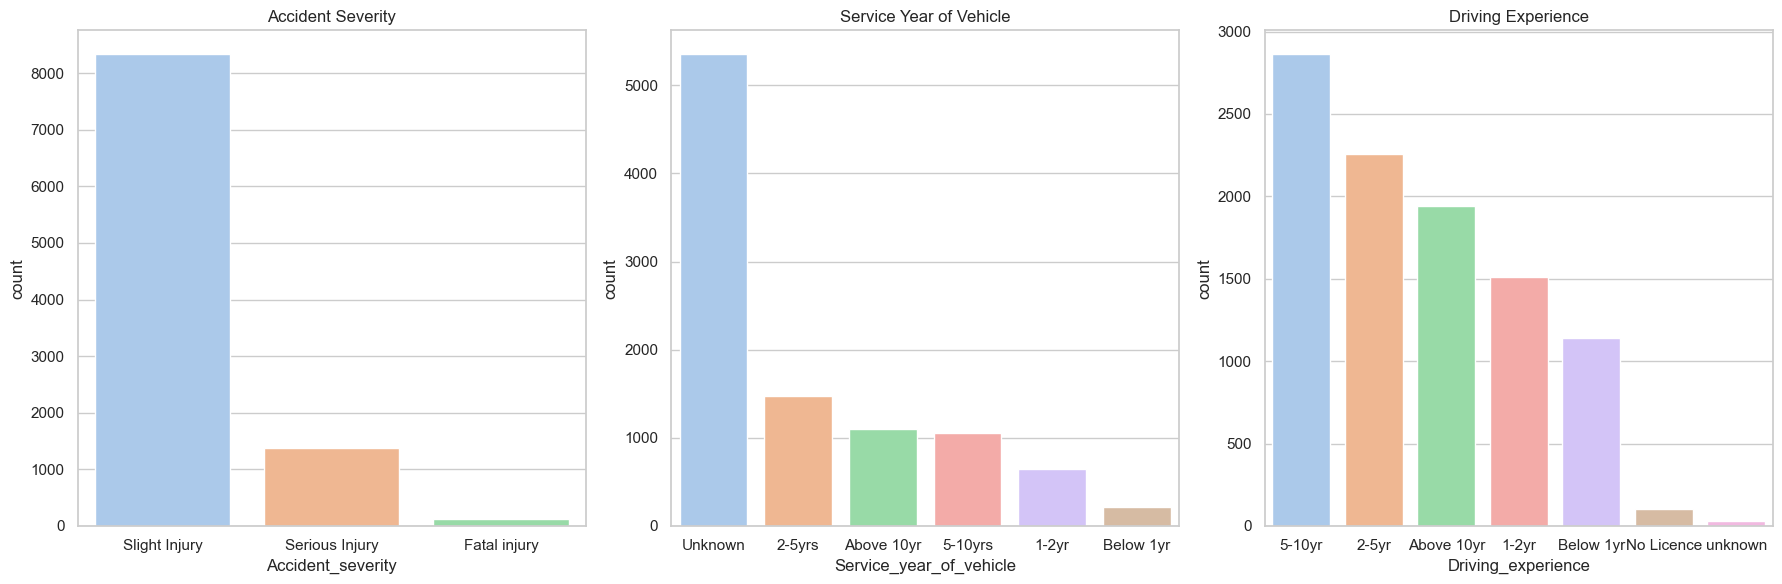

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accident severity
accident_order = df['Accident_severity'].value_counts().index
sns.countplot(x='Accident_severity', data=df, order=accident_order, ax=axes[0])
axes[0].set_title('Accident Severity')

# Service year of vehicle
service_year_order = df['Service_year_of_vehicle'].value_counts().index
sns.countplot(x='Service_year_of_vehicle', data=df, order=service_year_order, ax=axes[1])
axes[1].set_title('Service Year of Vehicle')

# Driving experience
driving_experience_order = df['Driving_experience'].value_counts().index
sns.countplot(x='Driving_experience', data=df, order=driving_experience_order, ax=axes[2])
axes[2].set_title('Driving Experience')


plt.tight_layout()


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9848 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         9848 non-null   object
 1   Day_of_week                  9848 non-null   object
 2   Age_band_of_driver           9848 non-null   object
 3   Sex_of_driver                9848 non-null   object
 4   Educational_level            9848 non-null   object
 5   Vehicle_driver_relation      9848 non-null   object
 6   Driving_experience           9848 non-null   object
 7   Owner_of_vehicle             9848 non-null   object
 8   Service_year_of_vehicle      9848 non-null   object
 9   Area_accident_occured        9848 non-null   object
 10  Lanes_or_Medians             9848 non-null   object
 11  Types_of_Junction            9848 non-null   object
 12  Road_surface_type            9848 non-null   object
 13  Road_surface_conditions      9848 non

### Bivariate Analysis
This involves analyzing a couple of variables together so as to make important inferences

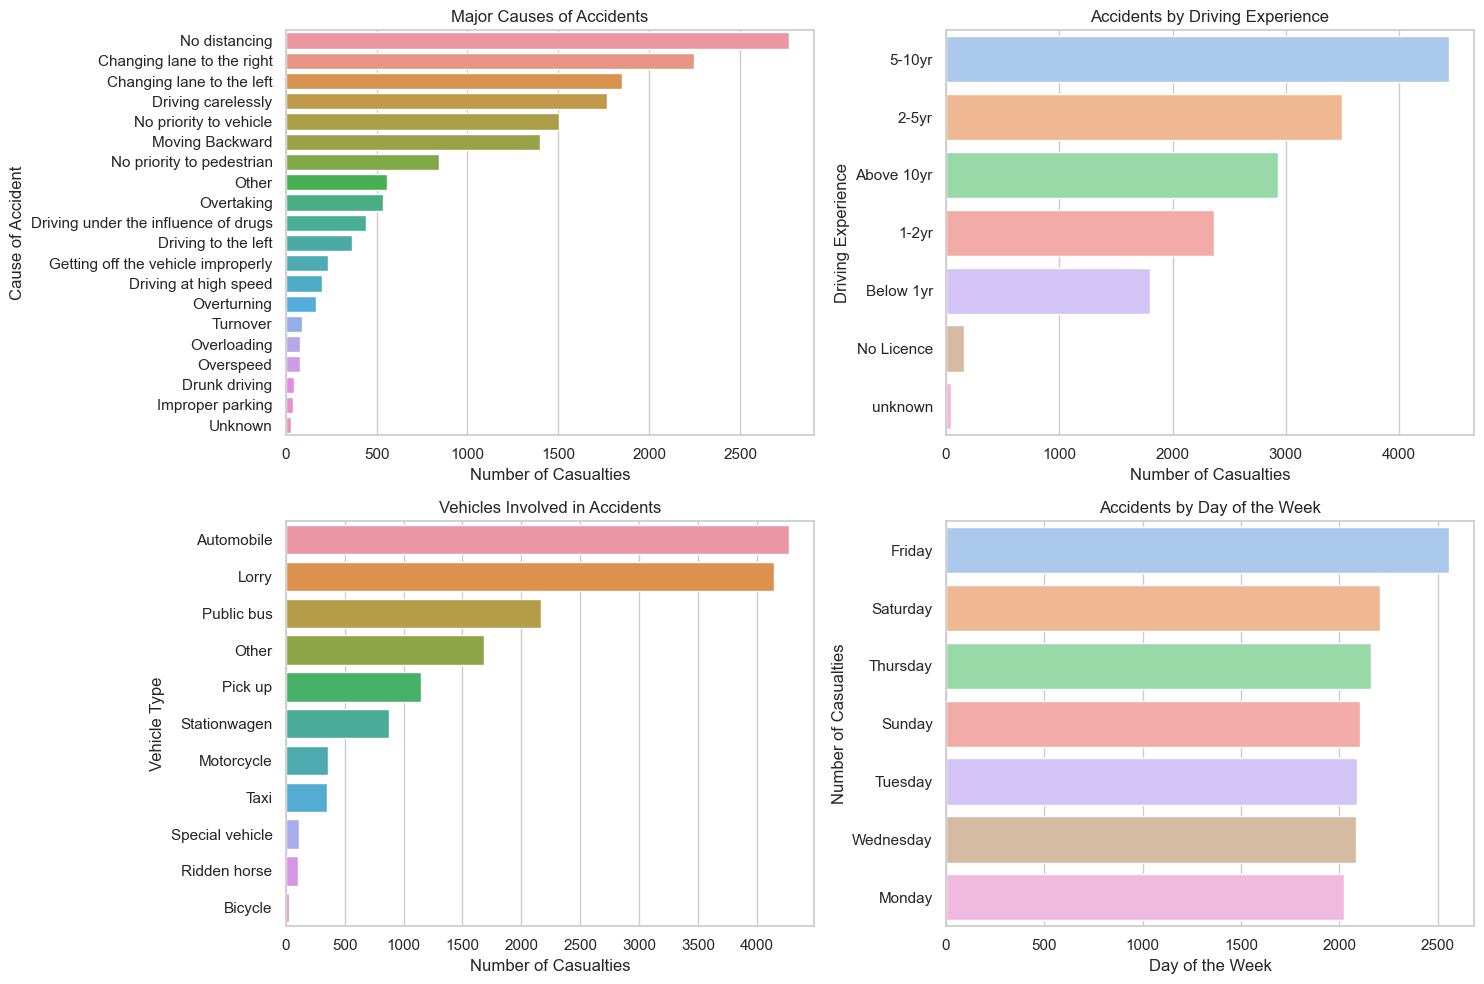

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#Plot major causes of accidents
sns.barplot(y='Cause_of_accident', x='Number_of_casualties', data=grouped_accident, ax=axes[0, 0])
axes[0, 0].set_title('Major Causes of Accidents')
axes[0, 0].set_xlabel('Number of Casualties')
axes[0, 0].set_ylabel('Cause of Accident')

# Plot driving experience
sns.barplot(y='Driving_experience', x='Number_of_casualties', data=grouped_driving, ax=axes[0, 1])
axes[0, 1].set_title('Accidents by Driving Experience')
axes[0, 1].set_xlabel('Number of Casualties')
axes[0, 1].set_ylabel('Driving Experience')

# Plot vehicle types involved in accidents
sns.barplot(y='vehicle_type', x='Number_of_casualties', data=grouped_vehicle, ax=axes[1, 0])
axes[1, 0].set_title('Vehicles Involved in Accidents')
axes[1, 0].set_xlabel('Number of Casualties')
axes[1, 0].set_ylabel('Vehicle Type')

# Plot accidents by day of the week
sns.barplot(y='Day_of_week', x='Number_of_casualties', data=grouped_week, ax=axes[1, 1])
axes[1, 1].set_title('Accidents by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Number of Casualties')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

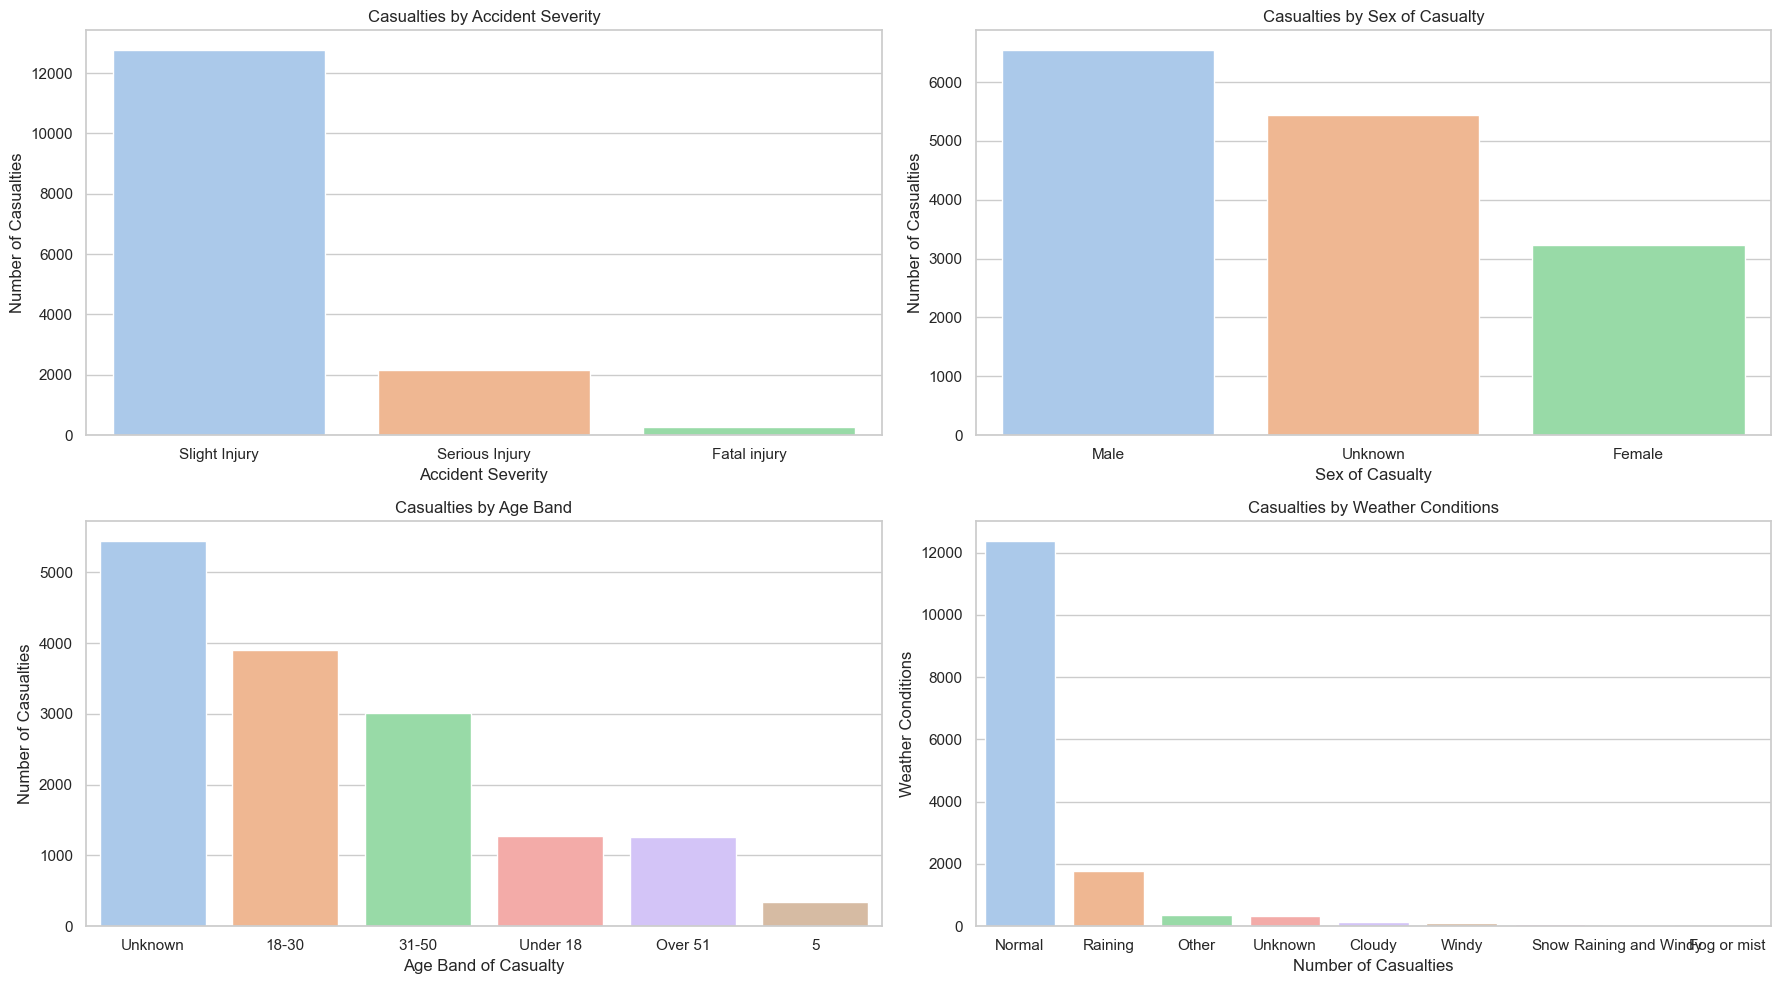

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and sorting for Accident Severity
grouped_severity = df.groupby('Accident_severity')['Number_of_casualties'].sum().reset_index()
grouped_severity = grouped_severity.sort_values(by='Number_of_casualties', ascending=False)

# Grouping and sorting for Sex of Casualty
grouped_sex = df.groupby('Sex_of_casualty')['Number_of_casualties'].sum().reset_index()
grouped_sex = grouped_sex.sort_values(by='Number_of_casualties', ascending=False)

# Grouping and sorting for Age Band of Casualty
grouped_age = df.groupby('Age_band_of_casualty')['Number_of_casualties'].sum().reset_index()
grouped_age = grouped_age.sort_values(by='Number_of_casualties', ascending=False)

# Grouping and sorting for Weather Conditions
grouped_weather = df.groupby('Weather_conditions')['Number_of_casualties'].sum().reset_index()
grouped_weather = grouped_weather.sort_values(by='Number_of_casualties', ascending=False)

# Creating subplots for side-by-side plots
plt.figure(figsize=(18, 10))

# First subplot: Accident Severity
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
sns.barplot(x='Accident_severity', y='Number_of_casualties', data=grouped_severity)
plt.title('Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')

# Second subplot: Sex of Casualty
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
sns.barplot(x='Sex_of_casualty', y='Number_of_casualties', data=grouped_sex)
plt.title('Casualties by Sex of Casualty')
plt.xlabel('Sex of Casualty')
plt.ylabel('Number of Casualties')

# Third subplot: Age Band of Casualty
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
sns.barplot(x='Age_band_of_casualty', y='Number_of_casualties', data=grouped_age)
plt.title('Casualties by Age Band')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Number of Casualties')

# Fourth subplot: Weather Conditions
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
sns.barplot(x='Weather_conditions', y='Number_of_casualties', data=grouped_weather)
plt.title('Casualties by Weather Conditions')
plt.xlabel('Number of Casualties')
plt.ylabel('Weather Conditions')

# Display the plots
plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()


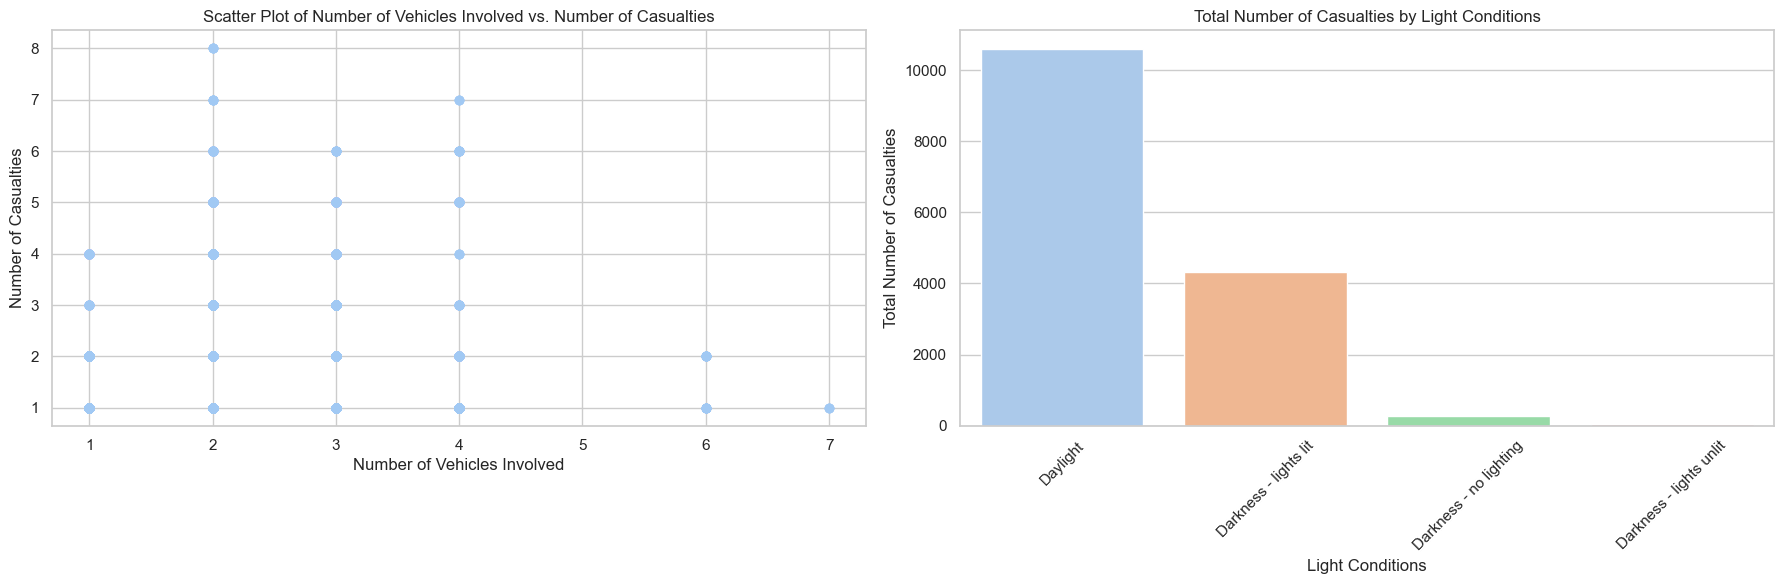

In [51]:
# Grouping data by Light_conditions
grouped_light_conditions = df.groupby('Light_conditions')['Number_of_casualties'].sum().reset_index()

# Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot of Number of Vehicles Involved vs. Number of Casualties
axes[0].scatter(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'], alpha=0.7)
axes[0].set_xlabel('Number of Vehicles Involved')
axes[0].set_ylabel('Number of Casualties')
axes[0].set_title('Scatter Plot of Number of Vehicles Involved vs. Number of Casualties')

# Bar plot for Total Number of Casualties by Light Conditions
sns.barplot(x='Light_conditions', y='Number_of_casualties', data=grouped_light_conditions, 
            order=grouped_light_conditions.sort_values('Number_of_casualties', ascending=False)['Light_conditions'], ax=axes[1])
axes[1].set_title('Total Number of Casualties by Light Conditions')
axes[1].set_xlabel('Light Conditions')
axes[1].set_ylabel('Total Number of Casualties')

# Rotate x-axis labels
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()


In [52]:
df['Number_of_vehicles_involved'].corr(df['Number_of_casualties'])

0.2155516708381601

In [ ]:
grouped_light = df.groupby()